<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분분석([PCA](https://ddongwon.tistory.com/114))
- 사진이나 이미지, 동영상등 대체적으로 용량이 커서 보관이 힘듬
- 주성분만 분석해서 가지고 있으면 디스크용량 등에 이로움(차원축소 알고리즘)
- 특성 : 데이터가 가진 속성

ex) 사진특성 : R : 빨 G : 녹 B : 파 K: 검, A : 필터)

ex) 과일사진의 경우, 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다. -> 차원(dimension : 디멘션)

- 특성이 많으면 선형모델의 성능이 높아지고 훈련데이터에 쉽게 과대적합이됨
- 차원축소
    - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함
- 주성준분석(PCA, Principal Component Anyalysis)
    - 줄어준 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 도 있어야함
    - 데이터에 있는 분산이 큰 방향을 찾는 것 -> 데이터를 잘 표현하는 벡터?
        - 분산 : 데이터가 널리 퍼져있는 정도
        
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUvtbN%2FbtrowkIz2oH%2FpFi7dcwZI0DolbyEpKTHPk%2Fimg.png" width=500px>

# 데이터

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:50:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:34--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) #샘플갯수, 너비*높이로 변경(2차원)

# 훈련(주성분분석)

In [3]:
#주성분분석
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # PCA 클래스를 만들 때 주성분의 개수를 지정함(원하는 숫자넣는 것)
pca.fit(fruits_2d) # 비지도 학습(target값x)

PCA(n_components=50)

## .components_
- 주성분이 들어있는 속성

In [4]:
# 주성분이 들어있는 속성
print(pca.components_.shape)
#50개의 속성, 10,000개의 특성갯수 => 1차원으로 변형

(50, 10000)


## 결과(그림)

In [5]:
# 배열의 값을 이용해서 이미지로 출력
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # ratio : 비율
    n=len(arr)  #n : 샘플갯수
    # 한줄에 10개씩_ rows : 전체행 갯수
    rows = int(np.ceil(n/10))
    #cols : 열 개수_ 행이 1개면 샘플 갯수, 아니면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개(샘플갯수)까지만 그림
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

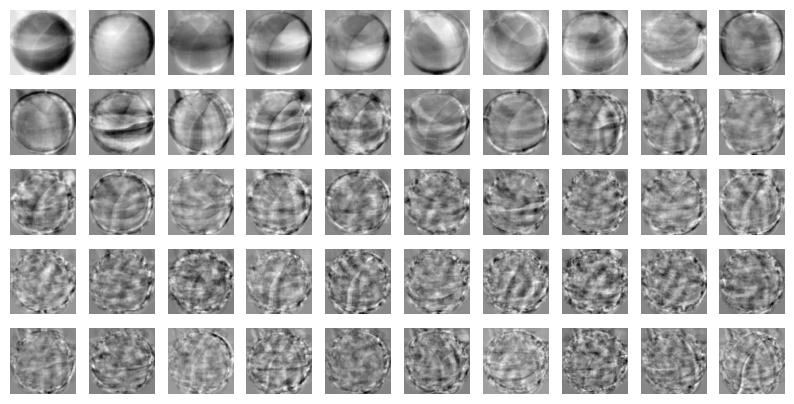

In [6]:
draw_fruits(pca.components_.reshape(-1, 100,100)) # 10*5 = 50
#주성분은 원본데이터를 투영하여 특성의 개수를 만들어냄

# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
# 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각해도 됨

# 원본의 분해 : .transform()
- 원본데이터를 주성분에 투영하여 특성의 개수를 줄이는 것

In [9]:
#10,000개 -> 50개로 줄임
# transform()메서드를 이용하여 원본데이터의 차원을 줄임

fruits_pca = pca.transform(fruits_2d)
print("fruits_2d  : ", fruits_2d.shape)
print("fruits_pca : ", fruits_pca.shape)

fruits_2d  :  (300, 10000)
fruits_pca :  (300, 50)


# 원본 재구성(복원) : .inverse_transform()

In [10]:
#어느정도의 손실이 발생함
# 하지만 최대한 분산이 큰방향으로 데이터를 추영했기 때문에 원본데이터를 산당부분 재구성이 가능
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


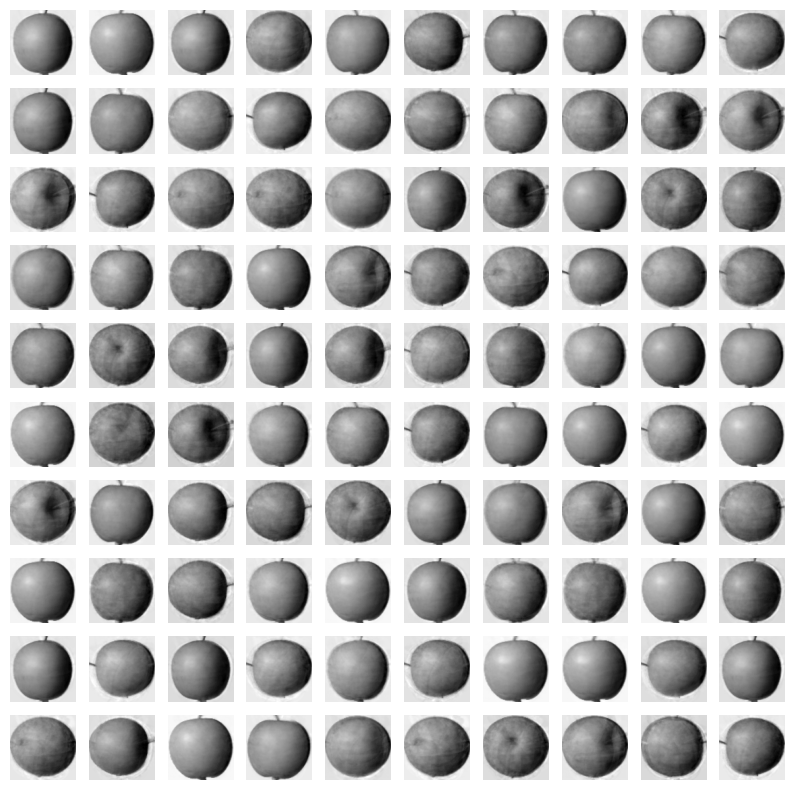

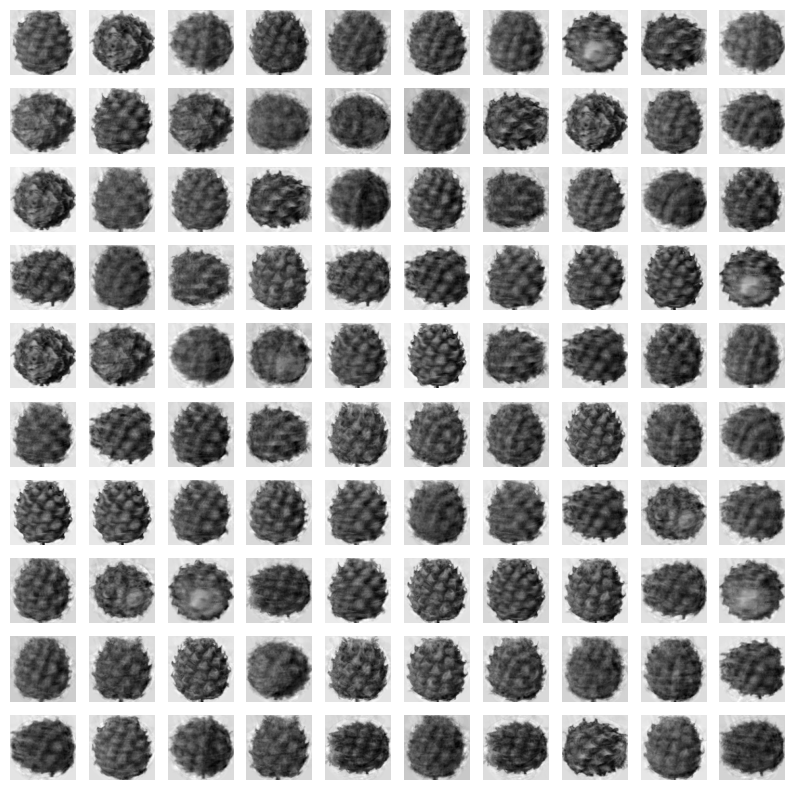

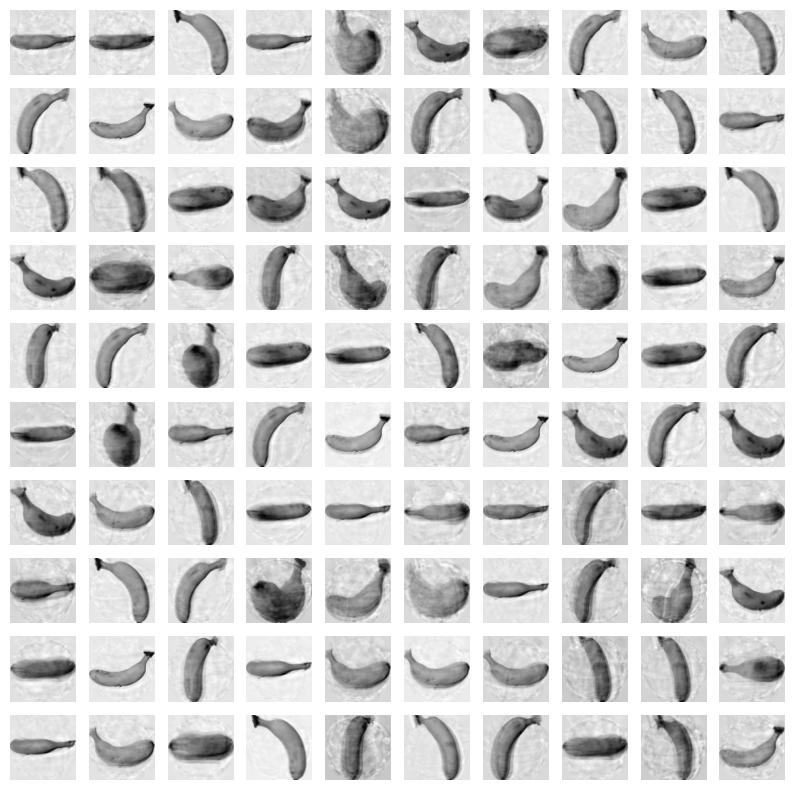

In [11]:
fruits_reconstrust = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstrust[start:start+100])
    print("\n")

# 결론
- 거의 모든 파일이 잘 복원된 듯 보임
- 특징을 잘 찾아낸 것 같음(일부 흐리고 번진 부분은 보이지만 중요한 특성은 아님)
- 50개의 특성을 10,000개로 늘린 것을 감안하면 성공적인듯 하다.
- 만약 주성분을 최대로 사용했다면 완벽하게 원본데이터를 재구성할 수 있을 것이다.
- 50개의 특성은 얼마나 분산을 보존하고 있을까?

# 설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 주성분의 설명된 분산 비율이 기록되어 있음
- 첫번째 주성분의 설명된 분산이 가장큼

In [12]:
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현학 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))
# 92.15%정도의 분산을 유지하고 있음(이미지 품질)

0.9214689106111524


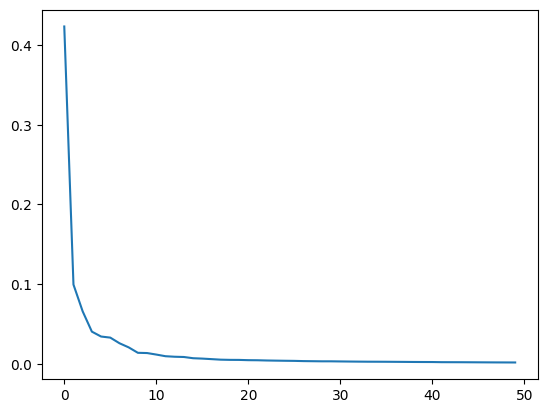

In [16]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
# 그래프의 처음 10개 주성분의 대부분으 표현하고 있음
# plt.show() # 없을 시 [<matplotlib.lines.Line2D at 0x7a24e0e690c0>]라는 문구가 뜸

# 지도학습(로지스틱회귀모델 이용)

In [17]:
# 로지스틱 회귀 모델을 이용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
#target 데이터생성
# 사과_0, 파인애플_1, 바나나_2
target = np.array([0]*100+[1]*100+[2]*100)
# 배열의 곱 : 리스트 안의 원소를 곱한 만큼 반복

In [20]:
#크로스 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) #fruits_2d 원본데이터 사용
print("test : ", np.mean(scores['test_score'])) # 99%로 과대적함
# 특성이 10,000개나 되기 때문에 300개의 샘플에서는 과대적합 모델이 됨
print("fit_time(훈련시간) : ", np.mean(scores['fit_time'])) #컴퓨터마다 다름

test :  0.9966666666666667
fit_time(훈련시간) :  1.3836670398712159


In [21]:
scores = cross_validate(lr, fruits_pca, target) #fruits_pca 조성분분석데이터
print("test : ", np.mean(scores['test_score']))
print("fit_time(훈련시간) : ", np.mean(scores['fit_time']))

test :  0.9966666666666667
fit_time(훈련시간) :  0.012587261199951173


## 결론

In [ ]:
"""
원본데이터(10,000개)
test :  0.9966666666666667
fit_time(훈련시간) :  1.3836670398712159

주성분분석 데이터(50개)
test :  0.9966666666666667
fit_time(훈련시간) :  0.012587261199951173

확률은 같음 훈련시간은 짧아짐


PCA로 훈련데이터의 차원을 축소하면 저장공간과 시간을 절약할 수 있음
"""

# 재훈련(n_components변화)

In [23]:
# n_components 매개변수에 주성분 개수를 50개로 진행
# 정수가 아닌 비율로도 줄 수 있음

pca = PCA(n_components=0.5) #주성분 50%(0~1 사이에 실수로 입력)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
# 2개의 주성분으로 2개의 특성만으로 원본데이터의 분산 50%를 표현할 수 있다.
print(pca.n_components_)

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 300개의 요소에 2개의 주성분

(300, 2)


## 결과확인

In [28]:
scores = cross_validate(lr, fruits_pca, target)
print("test : ", np.mean(scores['test_score']))
print("fit_time(훈련시간) : ", np.mean(scores['fit_time'])) #시간 살짝 늘어남

test :  0.9933333333333334
fit_time(훈련시간) :  0.026448726654052734


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
"""
                원본데이터(10,000개)  주성분분석(50개) 주성분분석(50%)
test               :  0.9967               0.9967        0.9933
fit_time(훈련시간) :  1.3837               0.0126        0.0264
"""

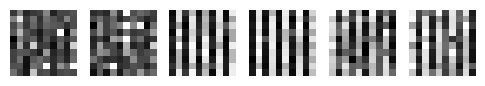

In [40]:
draw_fruits(fruits_pca.reshape(-1, 10, 10))

# k-평균알고리즘

In [43]:
from sklearn.cluster import KMeans
# k-평균 알고리즘으로 클러스터를 찾아봄
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))
"""
전 : (array([0, 1, 2], dtype=int32), array([112,  98,  90]))
현 : (array([0, 1, 2], dtype=int32), array([110,  99,  91]))
"""

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


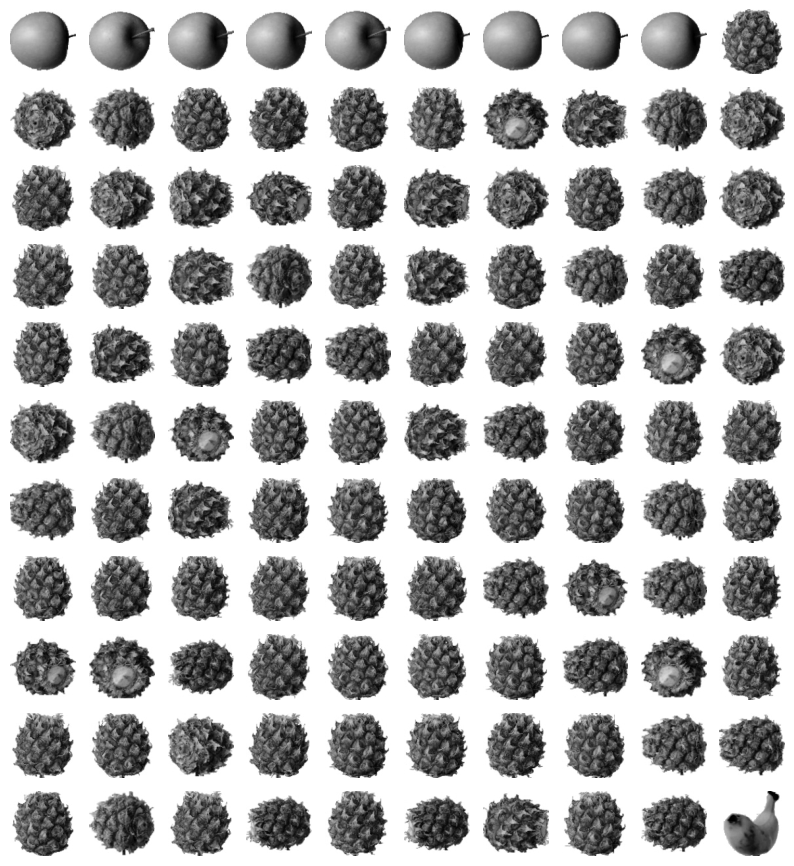

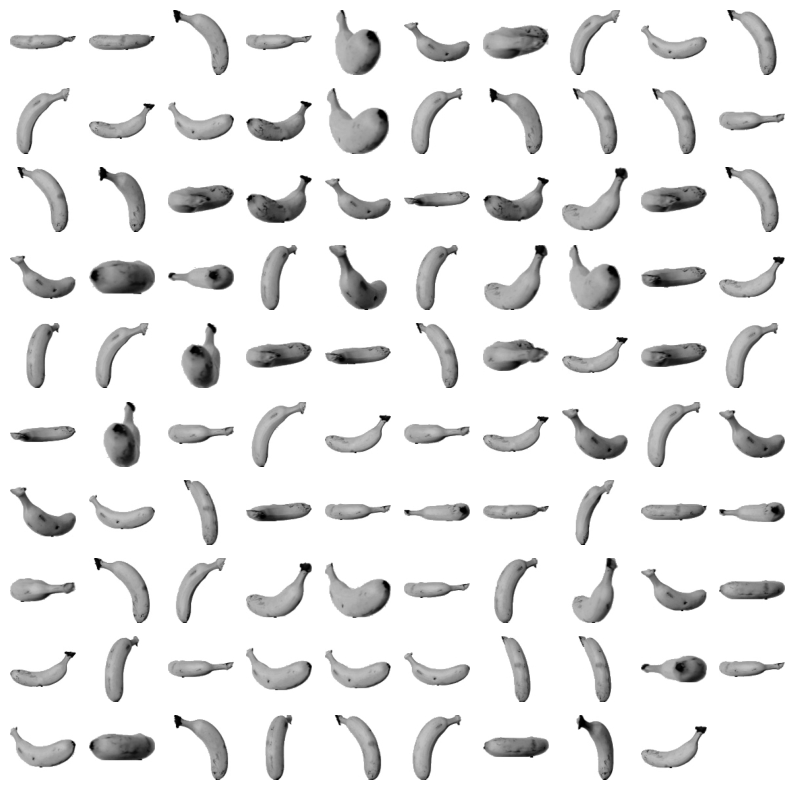

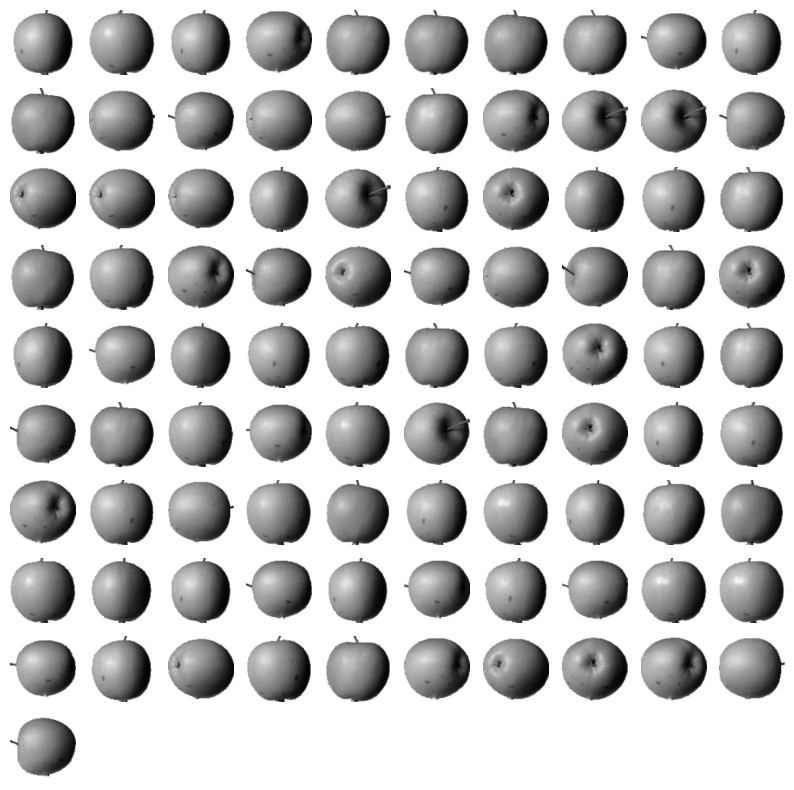

In [42]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
#KMeans가 찾은 레이블을 사용해 과일 이미지 출력

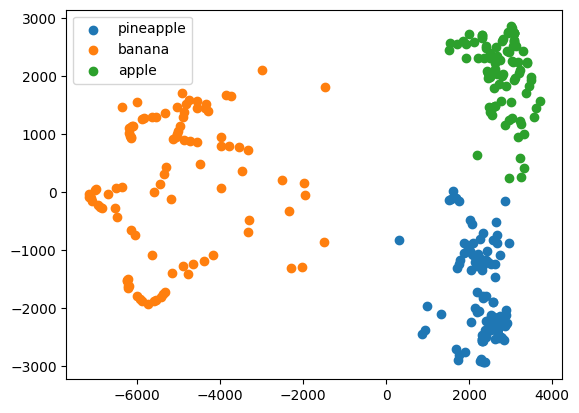

In [44]:
# 훈련데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다
# fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수 있다.
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
        # km.labels_를 사용해 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple']) #범례
plt.show()